In [56]:
import pandas as pd
import scanpy as sc
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [57]:
pathin_mapmycells="/home/hpc/lianyun.huang/singlecell/final4/output/output_mapmycells/raw/csvs"
pathin_data="/project/genomics/lianyun/CaIPACL/cp_from_homepath/data_final4"

pathout="/home/hpc/lianyun.huang/singlecell/final4/output/output_mapmycells"


title="soc_q" 
# all, allcases, ctrl_con, ctrl_ep, 
# ctrl_q, ctrl_soc, ctrl, con, ep, q, soc
# ep_con; q_con; soc_con; q_ep; soc_ep; soc_q

data=pd.read_csv(pathin_mapmycells+"/combine_"+title+".csv",skiprows=4)

keep_cols = ["cell_id", "class_name", "subclass_name", "cluster_name"]
data = data[keep_cols]

In [58]:
# read adata
adata=sc.read_h5ad(pathin_data + "/combine_"+ title +".h5ad")

# formatting
adata.obs.reset_index(inplace=True)
adata.obs = adata.obs.rename(columns={'index': 'cell_id'})

# Perform a left join on 'cell_id' (transfer the labels)
adata.obs = adata.obs.merge(data, on='cell_id', how='left')

adata.obs.to_csv(path_or_buf=pathout+"/mapmycells_"+title+".csv",sep="\t", index=False, header=True,quoting=None)
adata.obs

,cell_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,outlier,mt_outlier,status,batch,class_name,subclass_name,cluster_name
0,AAACCCAAGCCGTTAT-1-0,13,2.639057,19.0,2.995732,100.0,0.0,0.000000,0.000000,False,False,soc,0,34 Immune,334 Microglia NN,5312 Microglia NN_1
1,AAACCCAGTCATCCCT-1-0,16,2.833213,18.0,2.944439,100.0,3.0,1.386294,16.666668,False,False,soc,0,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0520 OB Meis2 Thsd7b Gaba_1
2,AAACGAAGTGTGTGTT-1-0,14,2.708050,21.0,3.091043,100.0,4.0,1.609438,19.047619,False,False,soc,0,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0002 CLA-EPd-CTX Car3 Glut_1
3,AAACGCTAGATTAGTG-1-0,17,2.890372,21.0,3.091043,100.0,4.0,1.609438,19.047619,False,False,soc,0,01 IT-ET Glut,017 CA3 Glut,0317 CA3 Glut_5
4,AAACGCTGTATACCCA-1-0,12,2.564949,20.0,3.044523,100.0,2.0,1.098612,10.000000,False,False,soc,0,34 Immune,334 Microglia NN,5312 Microglia NN_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11553,TTTGACTTCAACACGT-1-4,13,2.639057,15.0,2.772589,100.0,1.0,0.693147,6.666667,False,False,q,4,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0002 CLA-EPd-CTX Car3 Glut_1
11554,TTTGATCTCCCGTGTT-1-4,17,2.890372,21.0,3.091043,100.0,0.0,0.000000,0.000000,False,False,q,4,01 IT-ET Glut,023 SUB-ProS Glut,0386 SUB-ProS Glut_1
11555,TTTGGAGAGTATGGAT-1-4,19,2.995732,19.0,2.995732,100.0,2.0,1.098612,10.526316,False,False,q,4,20 MB GABA,198 IC Six3 En2 Gaba,3467 IC Six3 En2 Gaba_1
11556,TTTGGTTAGTGCTCGC-1-4,12,2.564949,16.0,2.833213,100.0,3.0,1.386294,18.750000,False,False,q,4,05 OB-IMN GABA,045 OB-STR-CTX Inh IMN,0601 OB-STR-CTX Inh IMN_2


In [59]:
# make a broader cell type

adata.obs["broadtype"]=adata.obs["class_name"]

adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Glut'),"Glut",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('GABA'),"GABA",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Dopa'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Sero'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Astro-Epen'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('OPC-Oligo'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('OEC'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Vascular'),"Others",adata.obs["broadtype"])
adata.obs["broadtype"]=np.where(adata.obs["class_name"].str.contains('Immune'),"Others",adata.obs["broadtype"])


adata.obs

,cell_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,outlier,mt_outlier,status,batch,class_name,subclass_name,cluster_name,broadtype
0,AAACCCAAGCCGTTAT-1-0,13,2.639057,19.0,2.995732,100.0,0.0,0.000000,0.000000,False,False,soc,0,34 Immune,334 Microglia NN,5312 Microglia NN_1,Others
1,AAACCCAGTCATCCCT-1-0,16,2.833213,18.0,2.944439,100.0,3.0,1.386294,16.666668,False,False,soc,0,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0520 OB Meis2 Thsd7b Gaba_1,GABA
2,AAACGAAGTGTGTGTT-1-0,14,2.708050,21.0,3.091043,100.0,4.0,1.609438,19.047619,False,False,soc,0,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0002 CLA-EPd-CTX Car3 Glut_1,Glut
3,AAACGCTAGATTAGTG-1-0,17,2.890372,21.0,3.091043,100.0,4.0,1.609438,19.047619,False,False,soc,0,01 IT-ET Glut,017 CA3 Glut,0317 CA3 Glut_5,Glut
4,AAACGCTGTATACCCA-1-0,12,2.564949,20.0,3.044523,100.0,2.0,1.098612,10.000000,False,False,soc,0,34 Immune,334 Microglia NN,5312 Microglia NN_1,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11553,TTTGACTTCAACACGT-1-4,13,2.639057,15.0,2.772589,100.0,1.0,0.693147,6.666667,False,False,q,4,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0002 CLA-EPd-CTX Car3 Glut_1,Glut
11554,TTTGATCTCCCGTGTT-1-4,17,2.890372,21.0,3.091043,100.0,0.0,0.000000,0.000000,False,False,q,4,01 IT-ET Glut,023 SUB-ProS Glut,0386 SUB-ProS Glut_1,Glut
11555,TTTGGAGAGTATGGAT-1-4,19,2.995732,19.0,2.995732,100.0,2.0,1.098612,10.526316,False,False,q,4,20 MB GABA,198 IC Six3 En2 Gaba,3467 IC Six3 En2 Gaba_1,GABA
11556,TTTGGTTAGTGCTCGC-1-4,12,2.564949,16.0,2.833213,100.0,3.0,1.386294,18.750000,False,False,q,4,05 OB-IMN GABA,045 OB-STR-CTX Inh IMN,0601 OB-STR-CTX Inh IMN_2,GABA


In [60]:
adata.write(pathin_data+"/mapmycellannotation_combine_"+title+".h5ad")

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


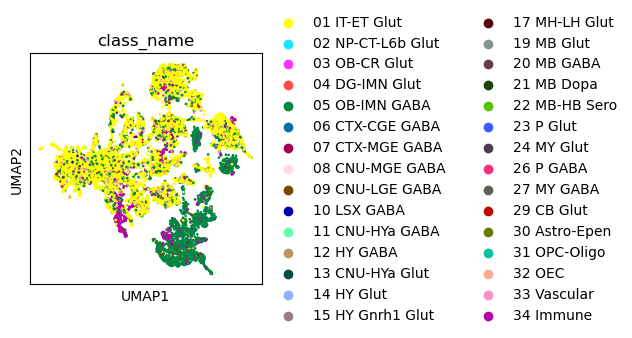

In [61]:
# plot detailed cell types
with plt.rc_context({'figure.figsize': (3, 3)}):
    fig=sc.pl.umap(adata, color= ["class_name"], size=15,show=False)
    plt.savefig(pathout+"/mapmycells_umap_"+title+".pdf",bbox_inches='tight')
plt.show()

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


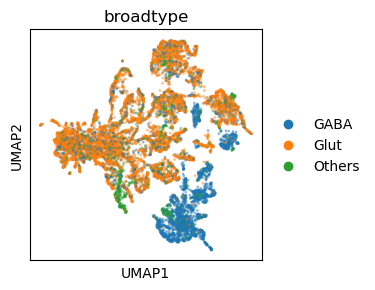

In [62]:
# plot broad cell types
with plt.rc_context({'figure.figsize': (3, 3)}):
    fig=sc.pl.umap(adata, color= ["broadtype"], size=15,alpha=0.5,show=False)
    plt.savefig(pathout+"/broadtype_umap_"+title+".pdf",bbox_inches='tight')
plt.show()

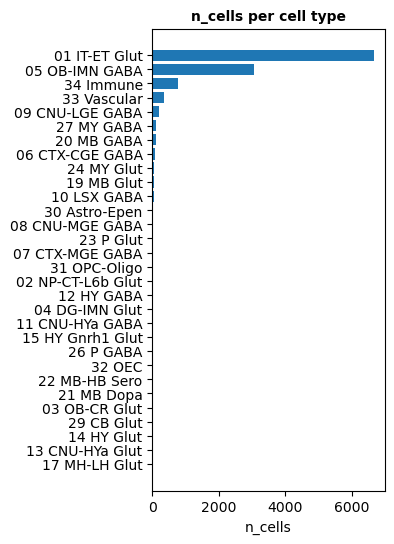

In [63]:
# Count the number of rows for each 'cell_type'
cell_type_counts = adata.obs['class_name'].value_counts()

# Create a bar plot
plt.rcParams["figure.figsize"] = (3,6)

fig, ax = plt.subplots()
ax.barh(cell_type_counts.index,cell_type_counts.values)
ax.invert_yaxis()

# Set X and Y axis labels and a title
plt.xlabel('n_cells')
plt.title('n_cells per cell type',fontsize=10, fontweight="bold")

plt.savefig(pathout+"/mapmycells_ncells_"+title+".pdf", bbox_inches='tight')


# Show the plot
plt.show()

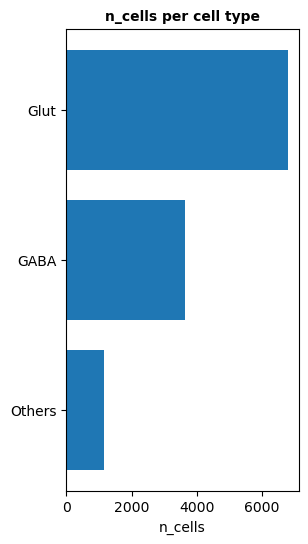

In [64]:
# Count the number of rows for each 'cell_type'
cell_type_counts = adata.obs['broadtype'].value_counts()

# Create a bar plot
plt.rcParams["figure.figsize"] = (3,6)

fig, ax = plt.subplots()
ax.barh(cell_type_counts.index,cell_type_counts.values)
ax.invert_yaxis()

# Set X and Y axis labels and a title
plt.xlabel('n_cells')
plt.title('n_cells per cell type',fontsize=10, fontweight="bold")

plt.savefig(pathout+"/mapmycells_broadtype_ncells_"+title+".pdf", bbox_inches='tight')


# Show the plot
plt.show()

### cross comparison

In [65]:
container=[]

for i in ["all","allcases", "con", "ctrl_con", "ctrl_ep", "ctrl_q", "ctrl_soc", "ctrl", "ep", "q", "soc"]:
    tmp=pd.read_csv(pathout+"/mapmycells_"+str(i)+".csv",sep="\t")
    tmp=tmp.sort_values(by="class_name")
    tmp=tmp['class_name'].value_counts().index.tolist()
    tmp=sorted(tmp)
    tmp=[i]+tmp
    
    container.append(tmp)
    

In [66]:
maxlength=max(len(sublist) for sublist in container)

#merge=[sublist + [None] * (maxlength - len(sublist)) for sublist in container]
merge=[sublist + [None] * (maxlength - len(sublist)) for sublist in container]

merge=pd.DataFrame(merge)

merge=merge.transpose()

merge.columns=merge.iloc[0]
merge=merge[1:]
      
merge.to_csv(pathout+"/celltype_table_combine.csv",sep="\t", index=False, header=True,quoting=None)
    
merge


,all,allcases,con,ctrl_con,ctrl_ep,ctrl_q,ctrl_soc,ctrl,ep,q,soc
1,01 IT-ET Glut,01 IT-ET Glut,01 IT-ET Glut,01 IT-ET Glut,01 IT-ET Glut,01 IT-ET Glut,01 IT-ET Glut,01 IT-ET Glut,01 IT-ET Glut,01 IT-ET Glut,01 IT-ET Glut
2,04 DG-IMN Glut,02 NP-CT-L6b Glut,03 OB-CR Glut,03 OB-CR Glut,04 DG-IMN Glut,04 DG-IMN Glut,02 NP-CT-L6b Glut,05 OB-IMN GABA,02 NP-CT-L6b Glut,03 OB-CR Glut,02 NP-CT-L6b Glut
3,05 OB-IMN GABA,04 DG-IMN Glut,04 DG-IMN Glut,04 DG-IMN Glut,05 OB-IMN GABA,05 OB-IMN GABA,05 OB-IMN GABA,06 CTX-CGE GABA,04 DG-IMN Glut,04 DG-IMN Glut,03 OB-CR Glut
4,06 CTX-CGE GABA,05 OB-IMN GABA,05 OB-IMN GABA,05 OB-IMN GABA,06 CTX-CGE GABA,06 CTX-CGE GABA,06 CTX-CGE GABA,07 CTX-MGE GABA,05 OB-IMN GABA,05 OB-IMN GABA,04 DG-IMN Glut
5,07 CTX-MGE GABA,06 CTX-CGE GABA,06 CTX-CGE GABA,06 CTX-CGE GABA,07 CTX-MGE GABA,07 CTX-MGE GABA,07 CTX-MGE GABA,08 CNU-MGE GABA,06 CTX-CGE GABA,06 CTX-CGE GABA,05 OB-IMN GABA
6,08 CNU-MGE GABA,07 CTX-MGE GABA,07 CTX-MGE GABA,07 CTX-MGE GABA,08 CNU-MGE GABA,09 CNU-LGE GABA,08 CNU-MGE GABA,09 CNU-LGE GABA,09 CNU-LGE GABA,07 CTX-MGE GABA,06 CTX-CGE GABA
7,09 CNU-LGE GABA,08 CNU-MGE GABA,09 CNU-LGE GABA,09 CNU-LGE GABA,09 CNU-LGE GABA,10 LSX GABA,09 CNU-LGE GABA,10 LSX GABA,10 LSX GABA,08 CNU-MGE GABA,07 CTX-MGE GABA
8,10 LSX GABA,09 CNU-LGE GABA,10 LSX GABA,10 LSX GABA,10 LSX GABA,11 CNU-HYa GABA,12 HY GABA,11 CNU-HYa GABA,11 CNU-HYa GABA,09 CNU-LGE GABA,08 CNU-MGE GABA
9,11 CNU-HYa GABA,10 LSX GABA,11 CNU-HYa GABA,11 CNU-HYa GABA,11 CNU-HYa GABA,12 HY GABA,13 CNU-HYa Glut,12 HY GABA,12 HY GABA,10 LSX GABA,09 CNU-LGE GABA
10,12 HY GABA,11 CNU-HYa GABA,12 HY GABA,12 HY GABA,12 HY GABA,13 CNU-HYa Glut,14 HY Glut,13 CNU-HYa Glut,15 HY Gnrh1 Glut,11 CNU-HYa GABA,10 LSX GABA
